# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

___All the outcomes and understandings are written in <font color= green> GREEN</font>___

In [406]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [407]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

## Import Data 

In [408]:
# Loading the data using Pandas
import pandas as pd
lead_df = pd.read_csv('Leads.csv')
lead_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [409]:
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [410]:
# The .shape code gives the no. of rows and columns
lead_df.shape

(9240, 37)

##  Inspect the dataframe
This helps to give a good idea of the dataframes.

In [411]:
# The .shape code gives the no. of rows and columns
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [412]:
# check the summary of the dataset
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [413]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning / Data Preprocessing


Handling the 'Select' level that is present in many of the categorical variables.

observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [414]:
# Converting 'Select' values to NaN.
lead_df = lead_df.replace('Select', np.nan)

In [415]:
# checking the columns for null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [416]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [417]:
# dropping the columns with missing values greater than or equal to 40% .
lead_df=lead_df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [418]:
# Finding the null percentages across columns after removing the above columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

#### Column: 'Specialization'
This column has 37% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

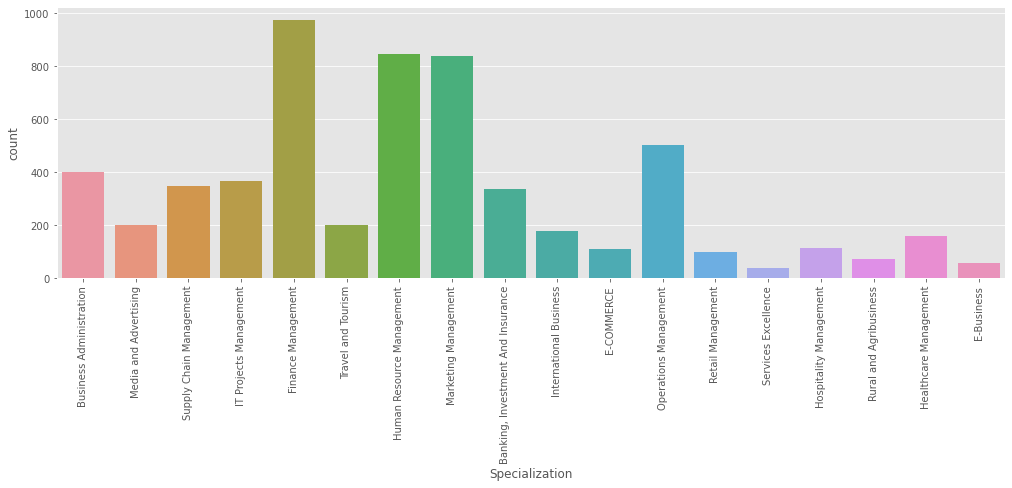

In [419]:
plt.figure(figsize=(17,5))
sns.countplot(lead_df['Specialization'])
plt.xticks(rotation=90)

There is 37% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [420]:
# Creating a separate category called 'Others' for this 
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')

######  Tags column
'Tags' column has 36% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

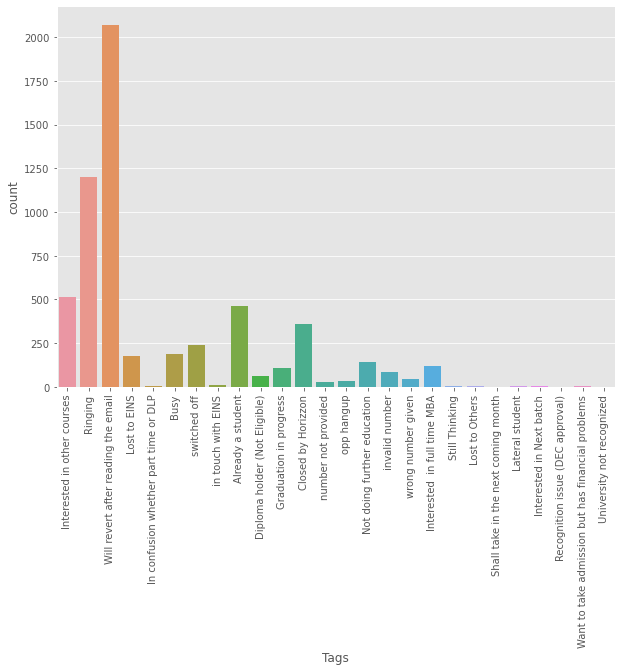

In [421]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(lead_df['Tags'])
plt.xticks(rotation=90)

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.



In [422]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_df['Tags']=lead_df['Tags'].replace(np.nan,'Will revert after reading the email')


######  Column: 'What matters most to you in choosing a course'¶
this column has 29% missing values

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

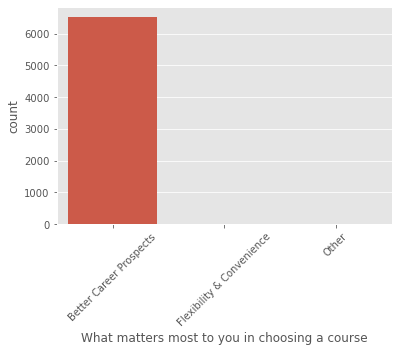

In [423]:
# Visualizing this column
sns.countplot(lead_df['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [424]:
# Finding the percentage of the different categories of this column:
round(lead_df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

We can see that this is highly skewed column so we can remove this column.

In [425]:
# Dropping this column 
lead_df=lead_df.drop('What matters most to you in choosing a course',axis=1)

 Column: 'What is your current occupation'
this column has 29% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

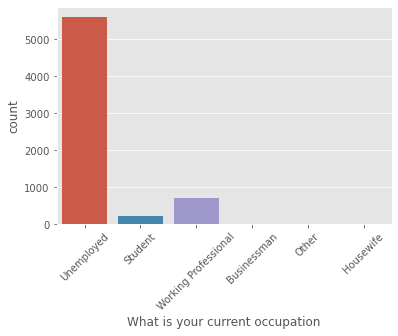

In [426]:
sns.countplot(lead_df['What is your current occupation'])
plt.xticks(rotation=45)

In [427]:
# Finding the percentage of the different categories of this column:
round(lead_df['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [428]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

 Column: 'Country'
This column has 27% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

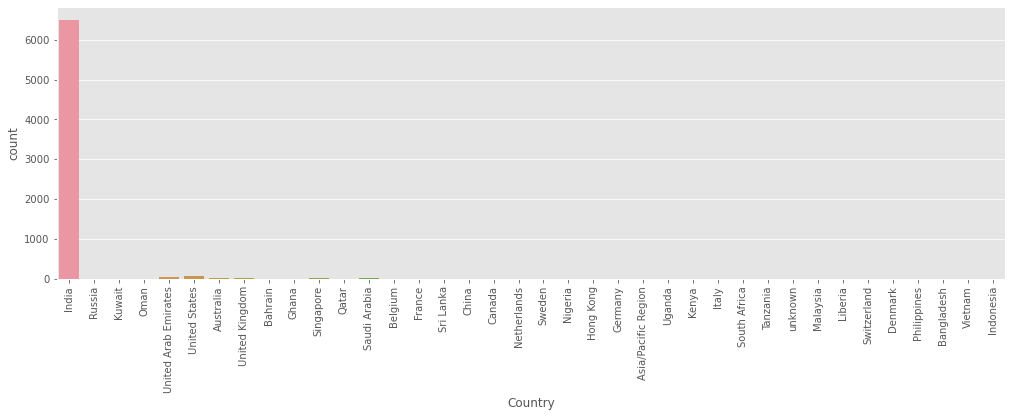

In [429]:
plt.figure(figsize=(17,5))
sns.countplot(lead_df['Country'])
plt.xticks(rotation=90)

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [430]:
# Imputing the missing data in the 'Country' column with 'India'
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')

######  Column: 'City'
This column has 40% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

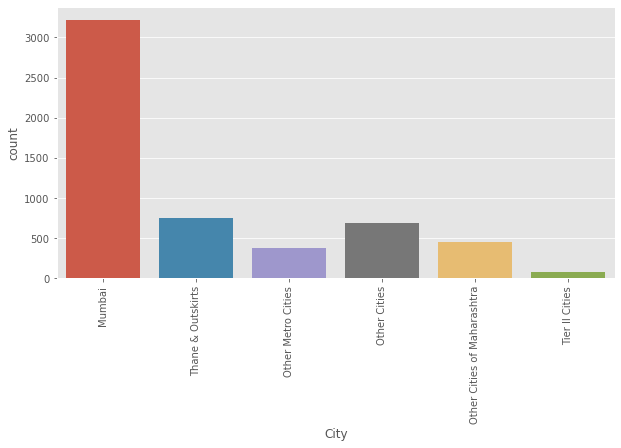

In [431]:
plt.figure(figsize=(10,5))
sns.countplot(lead_df['City'])
plt.xticks(rotation=90)

In [432]:
# Finding the percentage of the different categories of this column:
round(lead_df['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [433]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_df['City']=lead_df['City'].replace(np.nan,'Mumbai')

In [434]:
# Finding the null percentages across columns after removing the above columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Rest missing values are under 2% so we can drop these rows.

In [435]:
# Dropping the rows with null values
lead_df.dropna(inplace = True)

In [436]:
# Finding the null percentages across columns after removing the above columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing value in the dataset.

We can find the percentage of rows retained.

In [437]:
# Percentage of rows retained 
(len(lead_df.index)/9240)*100

98.2034632034632

We have retained 98% of the rows after cleaning the data .

#  Exploratory Data Analysis

## Univariate Analysis and Bivariate Analysis

###### Converted

Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [438]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%.

######  Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

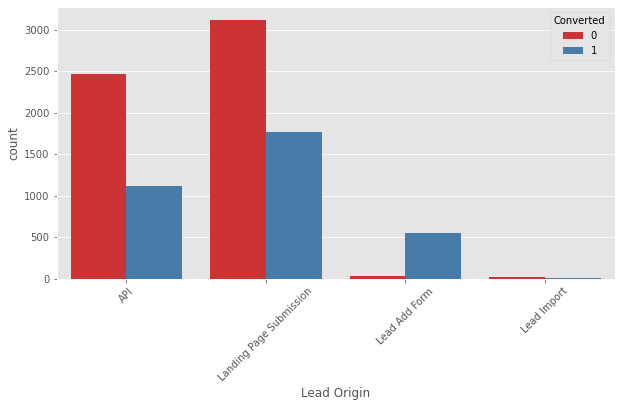

In [439]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 45)

###### Inference:

1.API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2.Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3.Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

######  Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

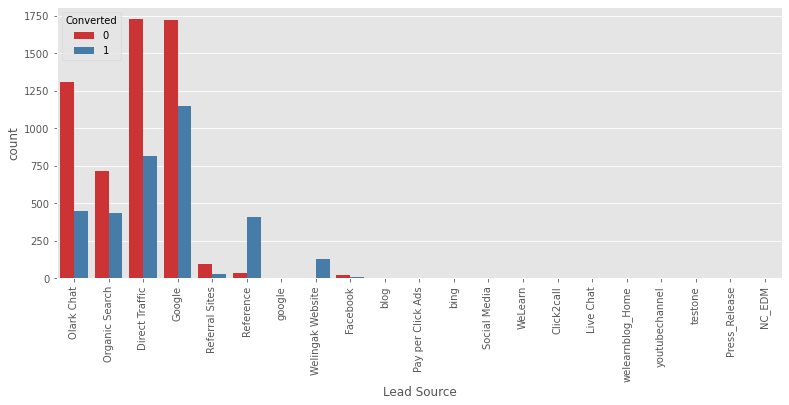

In [440]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df, palette='Set1')
plt.xticks(rotation = 90)

In [441]:
# Need to replace 'google' with 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

In [442]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

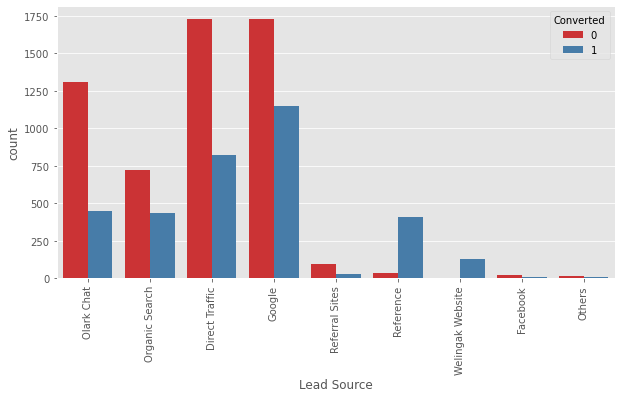

In [443]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

###### Inference:    

1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

######  Do not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

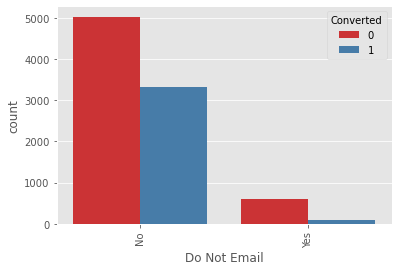

In [444]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

###### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

######  Do not call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

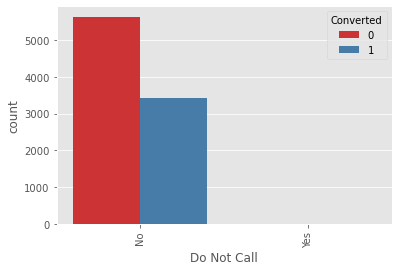

In [445]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

#####  TotalVisits

In [446]:
lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

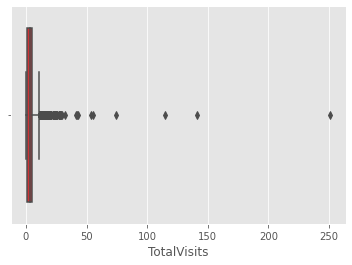

In [447]:
sns.boxplot(lead_df['TotalVisits'],orient='vert',palette='Set1')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [448]:
percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

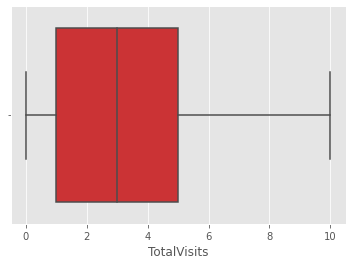

In [449]:
# Visualizing again
sns.boxplot(lead_df['TotalVisits'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

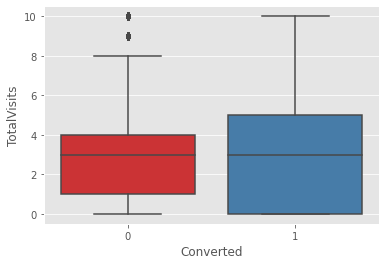

In [450]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df,palette='Set1')

Inference
Median for converted and not converted leads are the same.
Nothing can be concluded on the basis of Total Visits.

##### Total Time Spent on Website

In [451]:
lead_df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

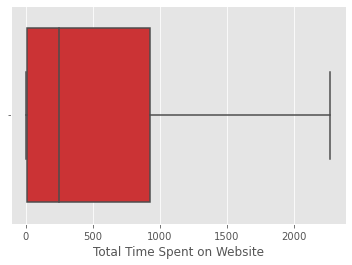

In [452]:
sns.boxplot(lead_df['Total Time Spent on Website'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

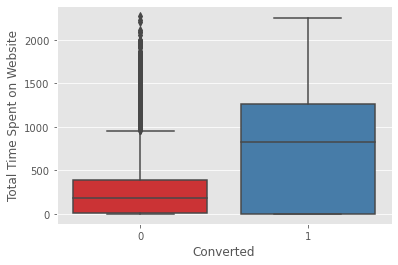

In [453]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df,palette='Set1')

Inference
Leads spending more time on the weblise are more likely to be converted.

Website should be made more engaging to make leads spend more time.

##### Page Views Per Visit

In [454]:
lead_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

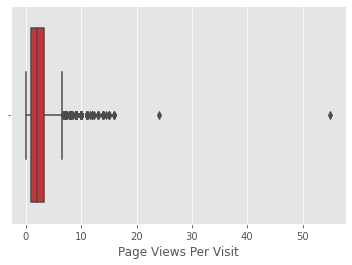

In [455]:
sns.boxplot(lead_df['Page Views Per Visit'],orient='vert',palette='Set1')

###### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [456]:
percentiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

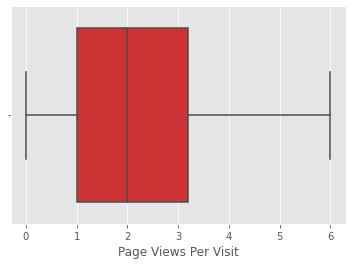

In [457]:
# Visualizing again
sns.boxplot(lead_df['Page Views Per Visit'],palette='Set1',orient='vert')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

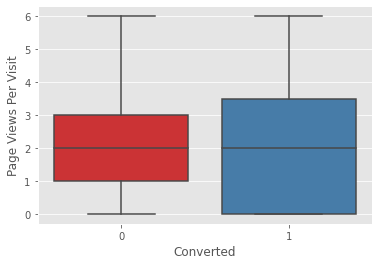

In [458]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_df,palette='Set1')

Inference
Median for converted and unconverted leads is the same.


Nothing can be said specifically for lead conversion from Page Views Per Visit.

##### Last Activity   

In [459]:
lead_df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

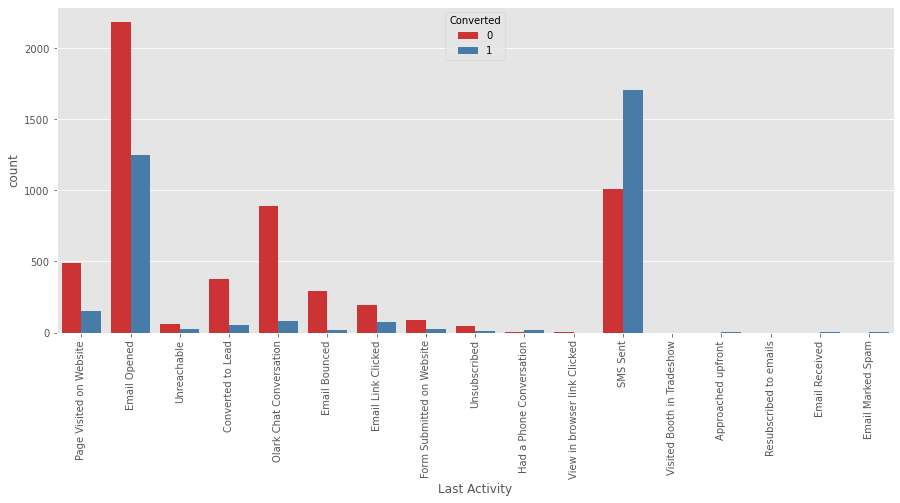

In [460]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

In [461]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

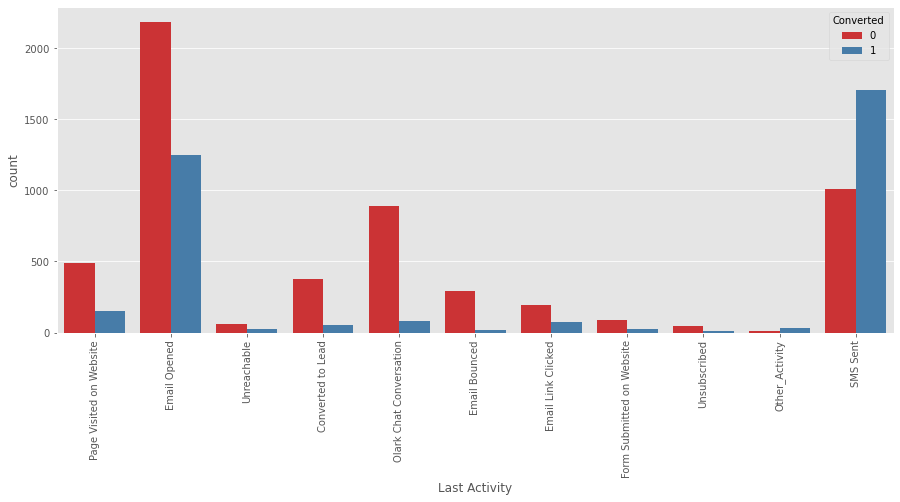

In [462]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
1.Most of the lead have their Email opened as their last activity.
2.Conversion rate for leads with last activity as SMS Sent is almost 60%.

#####  Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

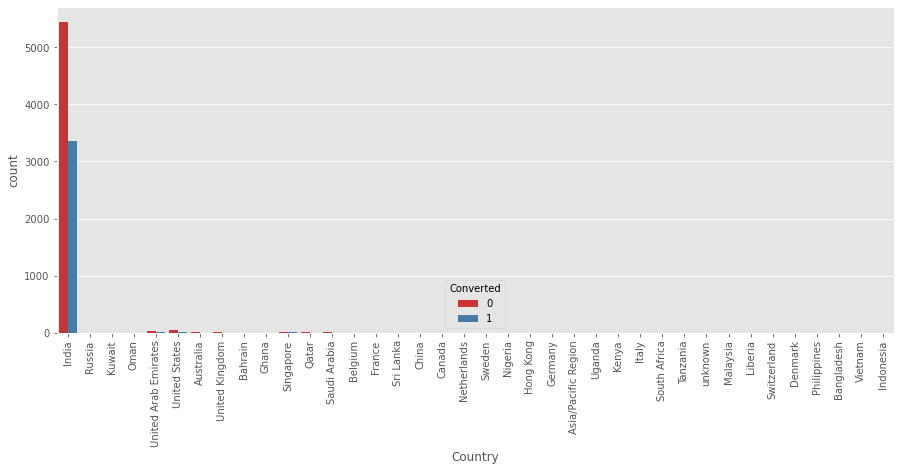

In [463]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most values are 'India' no such inference can be drawn

#####  Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

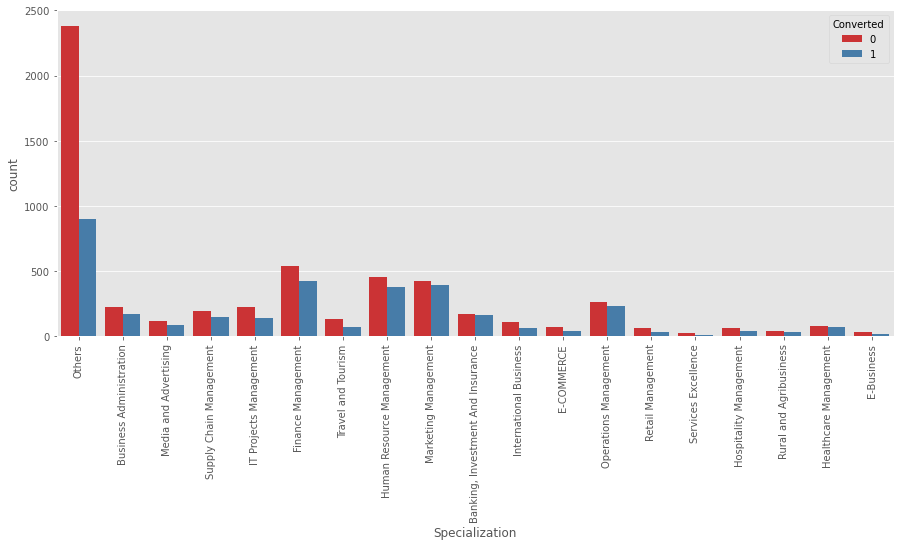

In [464]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Focus should be more on the Specialization with high conversion rate.

##### What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

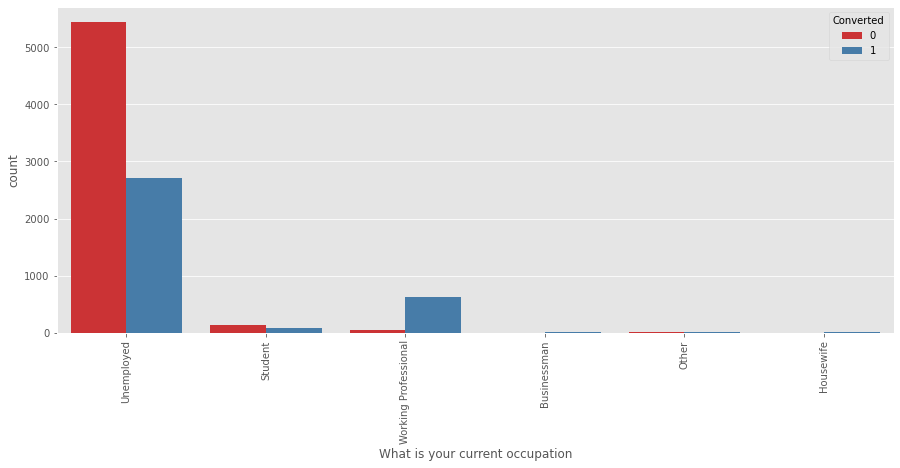

In [465]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference:
1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

##### Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

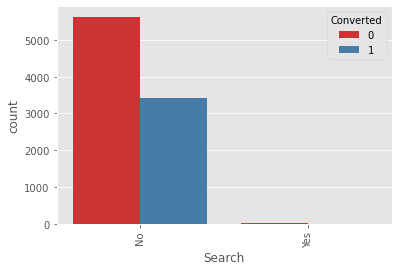

In [466]:
sns.countplot(x = "Search", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

##### Magazine

(array([0]), [Text(0, 0, 'No')])

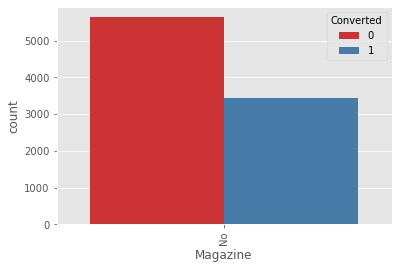

In [467]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

##### Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

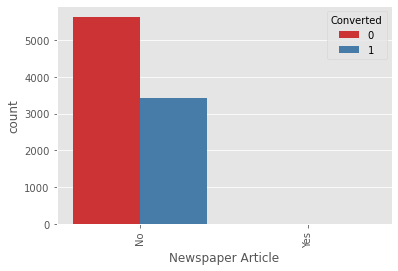

In [468]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

#####  X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

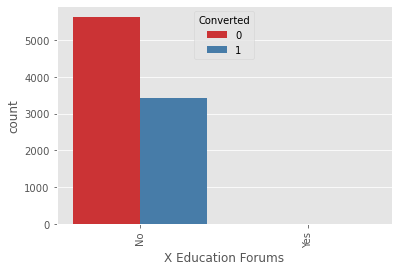

In [469]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

##### Newspaper

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

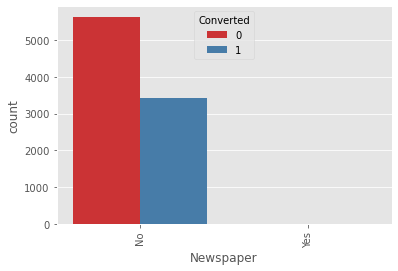

In [470]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

#####  Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

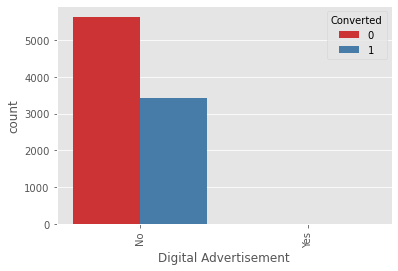

In [471]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

##### Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

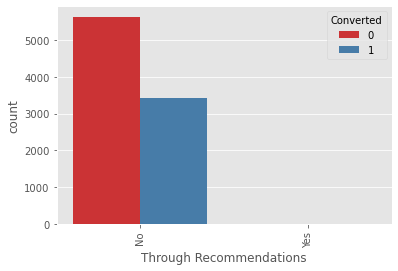

In [472]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

##### Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

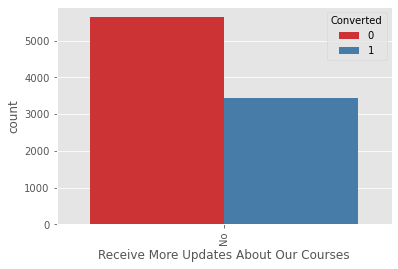

In [473]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

#####  Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

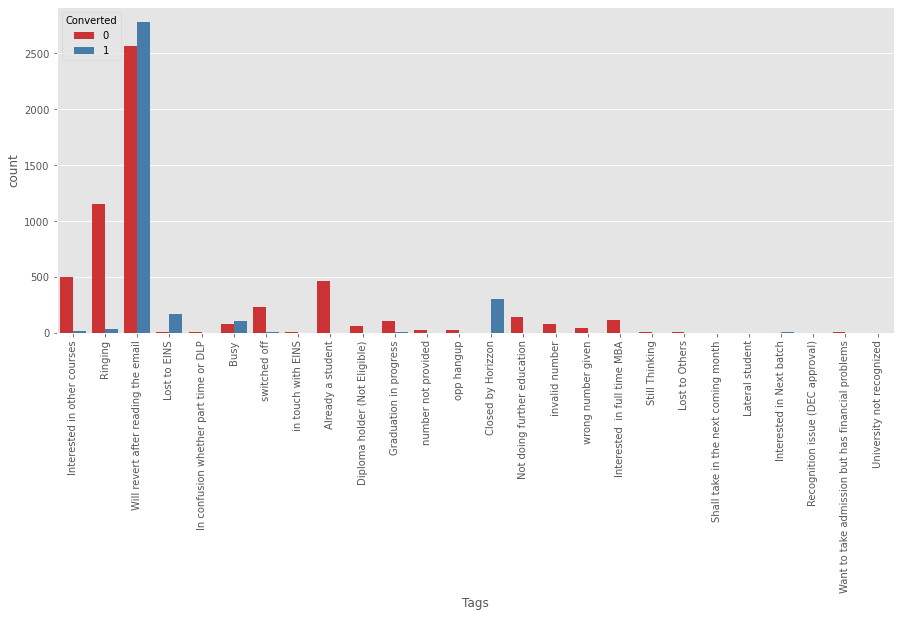

In [474]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model.

#####  Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

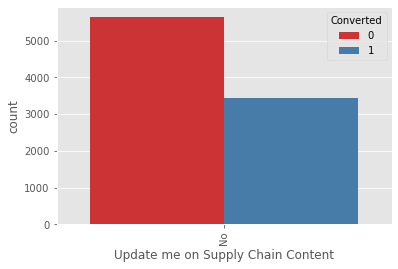

In [475]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

##### Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

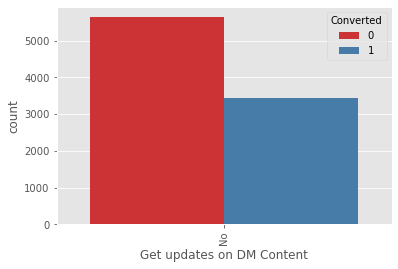

In [476]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

##### City

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

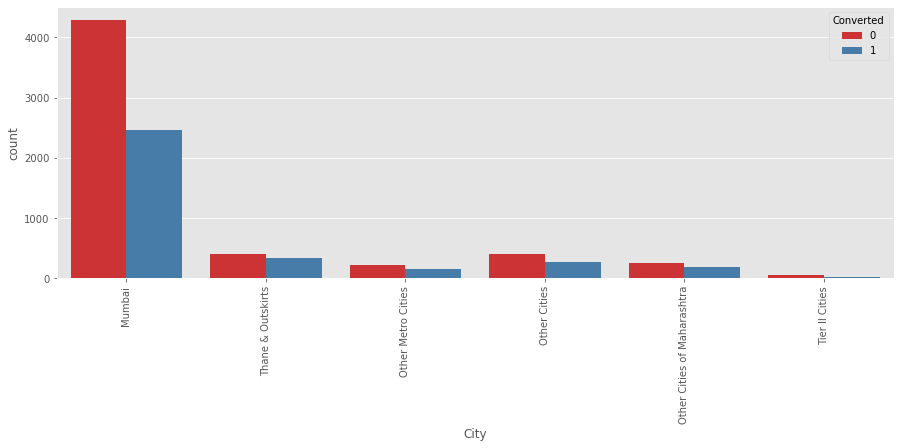

In [477]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most leads are from mumbai with around 50% conversion rate.

##### I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

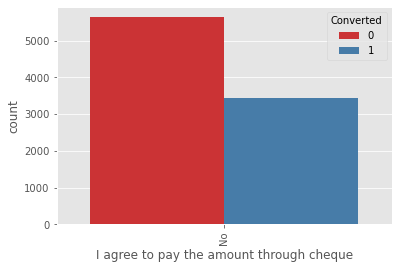

In [478]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

##### A free copy of Mastering The Interview

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

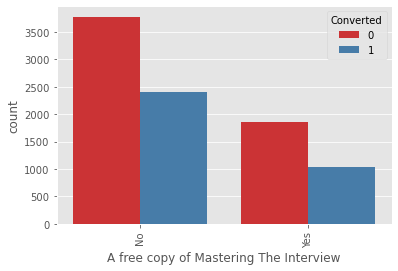

In [479]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

##### Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

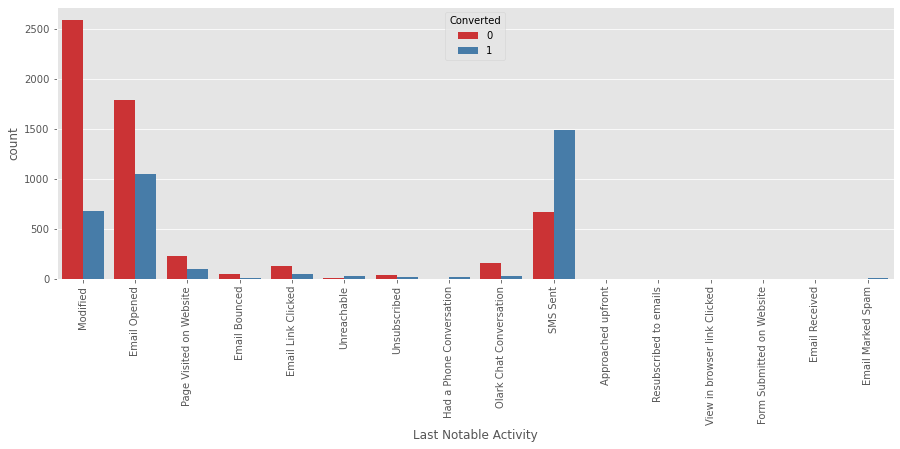

In [480]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

#### Results
Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [481]:
lead_df = lead_df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [482]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

## Data Preparation

#### Converting some binary variables (Yes/No) to 1/0

In [483]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_df[vars] = lead_df[vars].apply(binary_map)

## Dummy Variables

#### Creating Dummy variables for all  categorical features

'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [484]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [485]:
# Concatenating the dummy_data to the lead_data dataframe
lead_df = pd.concat([lead_df, dummy_data], axis=1)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


#### Dropping the columns for which dummies were created

In [486]:
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [487]:
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## 4. Test-Train Split

In [488]:
# Import the required library
from sklearn.model_selection import train_test_split

In [489]:
# Putting feature variable to X
X = lead_df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [490]:
# Putting target variable to y
y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [491]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [492]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Scaling

In [493]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [494]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scale the three numeric features
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [495]:
# Checking the Lead Conversion rate
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

##### We have almost 38% lead conversion rate.

## Feature Selection Using RFE

In [496]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE 
# running RFE with 20 variables as output
rfe = RFE(logreg, step=20)            
rfe = rfe.fit(X_train, y_train)

In [497]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True])

In [498]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activit

In [499]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_H

## 5. Model Building 

In [500]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [501]:
# Import RFE
from sklearn.feature_selection import RFE

### Assessing the model with StatsModels

In [502]:
import statsmodels.api as sm

In [503]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.6
Date:                Tue, 15 Nov 2022   Deviance:                       5135.2
Time:                        03:38:31   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6007      1.661      0.964      0.335      -1.654       4.855
Do Not Email                                            -1.6564      0.210     -7.881      0.000      -2.068      -1.244
Do Not Call                                             21.6137    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1101      0.041     26.997      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.1126      0.130     -8.531      0.000      -1.368      -0.857
Lead Origin_Lead Add Form                                1.4997      0.889      1.686      0.092      -0.244       3.243
Lead Origin_Lead Import                                  0.9100      0.477      1.909      0.056      -0.024       1.844
Lead Source_Olark Chat                                   1.1030      0.125      8.854      0.000       0.859       1.347
Lead Source_Reference                                    1.8289      0.914      2.001      0.045       0.038       3.620
Lead Source_Welingak Website                             4.4013      1.147      3.838      0.000       2.154       6.649
Last Activity_Email Link Clicked                         0.4575      0.396      1.156      0.248      -0.318       1.233
Last Activity_Email Opened                               0.6642      0.185      3.598      0.000       0.302       1.026
Last Activity_Olark Chat Conversation                   -0.6190      0.227     -2.733      0.006      -1.063      -0.175
Last Activity_Other_Activity                             2.1619      0.603      3.587      0.000       0.981       3.343
Last Activity_SMS Sent                                   1.1159      0.187      5.978      0.000       0.750       1.482
Last Activity_Unreachable                                0.2990      0.509      0.588      0.557      -0.698       1.296
Last Activity_Unsubscribed                               1.3943      1.125      1.240      0.215      -0.810       3.598
Specialization_Hospitality Management                   -0.4284      0.329     -1.303      0.193      -1.073       0.216
Specialization_Others                                   -1.1435      0.127     -9.022      0.000      -1.392      -0.895
What is your current occupation_Housewife               21.7279   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Student                 -0.5905      0.687     -0.859      0.390      -1.938       0.757
What is your current occupation_Unemployed              -1.0375      0.649     -1.599      0.110      -2.309       0.234
What is your current occupation_Working Professional     1

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [504]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

In [505]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.5
Date:                Tue, 15 Nov 2022   Deviance:                       5139.0
Time:                        03:38:33   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0893      1.642      1.272      0.203      -1.129       5.307
Do Not Email                                            -1.6601      0.210     -7.893      0.000      -2.072      -1.248
Do Not Call                                             20.6175      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1090      0.041     26.988      0.000       1.028       1.190
Lead Origin_Landing Page Submission                     -1.1060      0.130     -8.488      0.000      -1.361      -0.851
Lead Origin_Lead Add Form                                1.5026      0.889      1.690      0.091      -0.240       3.246
Lead Origin_Lead Import                                  0.9113      0.477      1.913      0.056      -0.023       1.845
Lead Source_Olark Chat                                   1.1031      0.125      8.854      0.000       0.859       1.347
Lead Source_Reference                                    1.8312      0.914      2.004      0.045       0.041       3.622
Lead Source_Welingak Website                             4.3991      1.147      3.836      0.000       2.151       6.647
Last Activity_Email Link Clicked                         0.4630      0.396      1.170      0.242      -0.313       1.239
Last Activity_Email Opened                               0.6694      0.185      3.625      0.000       0.307       1.031
Last Activity_Olark Chat Conversation                   -0.6158      0.227     -2.716      0.007      -1.060      -0.171
Last Activity_Other_Activity                             2.1672      0.603      3.596      0.000       0.986       3.348
Last Activity_SMS Sent                                   1.1207      0.187      6.002      0.000       0.755       1.487
Last Activity_Unreachable                                0.3037      0.509      0.597      0.550      -0.693       1.301
Last Activity_Unsubscribed                               1.4012      1.124      1.246      0.213      -0.803       3.605
Specialization_Hospitality Management                   -0.4286      0.329     -1.304      0.192      -1.073       0.216
Specialization_Others                                   -1.1398      0.127     -9.000      0.000      -1.388      -0.892
What is your current occupation_Student                 -1.0879      0.638     -1.706      0.088      -2.338       0.162
What is your current occupation_Unemployed              -1.5340      0.596     -2.573      0.010      -2.703      -0.365
What is your current occupation_Working Professional     1.0951      0.624      1.754      0.079      -0.128       2.319
City_Tier II Cities                                     -0

Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [506]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [507]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.5
Date:                Tue, 15 Nov 2022   Deviance:                       5139.1
Time:                        03:38:35   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3292      1.165      1.999      0.046       0.045       4.613
Do Not Email                                            -1.6609      0.210     -7.894      0.000      -2.073      -1.248
Do Not Call                                             20.6173      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1089      0.041     26.987      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1062      0.130     -8.491      0.000      -1.362      -0.851
Lead Origin_Lead Add Form                                1.5025      0.889      1.690      0.091      -0.240       3.245
Lead Origin_Lead Import                                  0.9110      0.477      1.912      0.056      -0.023       1.845
Lead Source_Olark Chat                                   1.1026      0.125      8.852      0.000       0.858       1.347
Lead Source_Reference                                    1.8308      0.914      2.004      0.045       0.040       3.621
Lead Source_Welingak Website                             4.3992      1.147      3.836      0.000       2.152       6.647
Last Activity_Email Link Clicked                         0.4639      0.396      1.172      0.241      -0.312       1.240
Last Activity_Email Opened                               0.6702      0.185      3.631      0.000       0.308       1.032
Last Activity_Olark Chat Conversation                   -0.6148      0.227     -2.712      0.007      -1.059      -0.170
Last Activity_Other_Activity                             2.1863      0.595      3.673      0.000       1.020       3.353
Last Activity_SMS Sent                                   1.1216      0.187      6.008      0.000       0.756       1.487
Last Activity_Unreachable                                0.3045      0.509      0.599      0.549      -0.693       1.302
Last Activity_Unsubscribed                               1.4024      1.124      1.247      0.212      -0.801       3.606
Specialization_Hospitality Management                   -0.4286      0.329     -1.303      0.192      -1.073       0.216
Specialization_Others                                   -1.1401      0.127     -9.003      0.000      -1.388      -0.892
What is your current occupation_Student                 -1.0880      0.638     -1.706      0.088      -2.338       0.162
What is your current occupation_Unemployed              -1.5342      0.596     -2.573      0.010      -2.703      -0.365
What is your current occupation_Working Professional     1.0948      0.624      1.754      0.079      -0.129       2.318
City_Tier II Cities                                     -0

Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.

In [508]:
col1 = col1.drop('What is your current occupation_Student')

In [509]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.1
Date:                Tue, 15 Nov 2022   Deviance:                       5142.1
Time:                        03:38:37   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4075
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4073      1.029      1.368      0.171      -0.609       3.423
Do Not Email                                            -1.6564      0.210     -7.882      0.000      -2.068      -1.245
Do Not Call                                             20.6024      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1097      0.041     27.014      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.1198      0.130     -8.611      0.000      -1.375      -0.865
Lead Origin_Lead Add Form                                1.4962      0.889      1.683      0.092      -0.247       3.239
Lead Origin_Lead Import                                  0.9041      0.477      1.896      0.058      -0.030       1.839
Lead Source_Olark Chat                                   1.0976      0.124      8.818      0.000       0.854       1.342
Lead Source_Reference                                    1.8375      0.914      2.011      0.044       0.047       3.628
Lead Source_Welingak Website                             4.4053      1.147      3.842      0.000       2.158       6.653
Last Activity_Email Link Clicked                         0.4509      0.396      1.139      0.255      -0.325       1.226
Last Activity_Email Opened                               0.6625      0.184      3.593      0.000       0.301       1.024
Last Activity_Olark Chat Conversation                   -0.6185      0.226     -2.733      0.006      -1.062      -0.175
Last Activity_Other_Activity                             2.1819      0.595      3.665      0.000       1.015       3.349
Last Activity_SMS Sent                                   1.1157      0.187      5.980      0.000       0.750       1.481
Last Activity_Unreachable                                0.2980      0.509      0.586      0.558      -0.699       1.295
Last Activity_Unsubscribed                               1.3936      1.125      1.239      0.215      -0.810       3.598
Specialization_Hospitality Management                   -0.4362      0.329     -1.327      0.184      -1.080       0.208
Specialization_Others                                   -1.1526      0.126     -9.116      0.000      -1.400      -0.905
What is your current occupation_Unemployed              -0.5963      0.214     -2.793      0.005      -1.015      -0.178
What is your current occupation_Working Professional     2.0314      0.284      7.145      0.000       1.474       2.589
City_Tier II Cities                                     -0.5654      0.456     -1.241      0.215      -1.458       0.328
Last Notable Activity_Email Bounced                     -0

Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column.

In [510]:
col1 = col1.drop('Lead Origin_Lead Add Form')

In [511]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.6
Date:                Tue, 15 Nov 2022   Deviance:                       5145.3
Time:                        03:38:39   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4243      1.028      1.385      0.166      -0.591       3.440
Do Not Email                                            -1.6588      0.210     -7.894      0.000      -2.071      -1.247
Do Not Call                                             20.5939      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1077      0.041     27.009      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1386      0.130     -8.778      0.000      -1.393      -0.884
Lead Origin_Lead Import                                  0.8877      0.477      1.861      0.063      -0.047       1.823
Lead Source_Olark Chat                                   1.0910      0.124      8.783      0.000       0.848       1.334
Lead Source_Reference                                    3.3192      0.244     13.618      0.000       2.841       3.797
Lead Source_Welingak Website                             5.8929      0.731      8.062      0.000       4.460       7.325
Last Activity_Email Link Clicked                         0.4465      0.396      1.129      0.259      -0.329       1.222
Last Activity_Email Opened                               0.6636      0.184      3.603      0.000       0.303       1.025
Last Activity_Olark Chat Conversation                   -0.6247      0.226     -2.762      0.006      -1.068      -0.181
Last Activity_Other_Activity                             2.1779      0.595      3.661      0.000       1.012       3.344
Last Activity_SMS Sent                                   1.1122      0.186      5.967      0.000       0.747       1.477
Last Activity_Unreachable                                0.2952      0.509      0.580      0.562      -0.702       1.292
Last Activity_Unsubscribed                               1.3918      1.124      1.238      0.216      -0.812       3.595
Specialization_Hospitality Management                   -0.4377      0.329     -1.332      0.183      -1.082       0.207
Specialization_Others                                   -1.1650      0.126     -9.223      0.000      -1.413      -0.917
What is your current occupation_Unemployed              -0.5933      0.214     -2.778      0.005      -1.012      -0.175
What is your current occupation_Working Professional     2.0311      0.284      7.142      0.000       1.474       2.588
City_Tier II Cities                                     -0.5656      0.455     -1.242      0.214      -1.458       0.327
Last Notable Activity_Email Bounced                     -0.6504      1.142     -0.569      0.569      -2.890       1.589
Last Notable Activity_Email Link Clicked                -1

### Checking for VIF values:

In [512]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,34.18
22,Last Notable Activity_Email Opened,22.25
23,Last Notable Activity_Modified,19.91
26,Last Notable Activity_SMS Sent,18.17
9,Last Activity_Email Opened,9.21
12,Last Activity_SMS Sent,7.63
3,Lead Origin_Landing Page Submission,7.27
16,Specialization_Others,4.66
18,What is your current occupation_Working Profes...,3.93
21,Last Notable Activity_Email Link Clicked,3.92


In [513]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

In [514]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.4
Date:                Tue, 15 Nov 2022   Deviance:                       5152.8
Time:                        03:38:42   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4065
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8416      1.006      0.836      0.403      -1.131       2.814
Do Not Email                                            -1.6518      0.210     -7.850      0.000      -2.064      -1.239
Do Not Call                                             20.5595      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1077      0.041     27.021      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1428      0.130     -8.804      0.000      -1.397      -0.888
Lead Origin_Lead Import                                  0.8679      0.477      1.820      0.069      -0.067       1.803
Lead Source_Olark Chat                                   1.0968      0.124      8.830      0.000       0.853       1.340
Lead Source_Reference                                    3.3310      0.243     13.683      0.000       2.854       3.808
Lead Source_Welingak Website                             5.8842      0.731      8.051      0.000       4.452       7.317
Last Activity_Email Link Clicked                         0.4563      0.397      1.150      0.250      -0.321       1.234
Last Activity_Email Opened                               0.6687      0.184      3.629      0.000       0.308       1.030
Last Activity_Olark Chat Conversation                   -0.6135      0.226     -2.715      0.007      -1.057      -0.171
Last Activity_Other_Activity                             2.1694      0.595      3.646      0.000       1.003       3.336
Last Activity_SMS Sent                                   1.1030      0.186      5.919      0.000       0.738       1.468
Last Activity_Unreachable                                0.2811      0.509      0.552      0.581      -0.716       1.279
Last Activity_Unsubscribed                               1.3749      1.124      1.223      0.221      -0.829       3.579
Specialization_Hospitality Management                   -0.4343      0.329     -1.319      0.187      -1.080       0.211
Specialization_Others                                   -1.1772      0.126     -9.306      0.000      -1.425      -0.929
What is your current occupation_Working Professional     2.6054      0.196     13.301      0.000       2.222       2.989
City_Tier II Cities                                     -0.5801      0.455     -1.274      0.203      -1.472       0.312
Last Notable Activity_Email Bounced                     -0.6472      1.143     -0.566      0.571      -2.887       1.592
Last Notable Activity_Email Link Clicked                -1.8631      1.092     -1.706      0.088      -4.003       0.277
Last Notable Activity_Email Opened                      -1

In [515]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
col1 = col1.drop('Lead Origin_Lead Import')

In [516]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.9
Date:                Tue, 15 Nov 2022   Deviance:                       5155.9
Time:                        03:38:43   Pearson chi2:                 6.41e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8740      1.006      0.869      0.385      -1.097       2.845
Do Not Email                                            -1.6515      0.210     -7.851      0.000      -2.064      -1.239
Do Not Call                                             20.5451      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1005      0.041     27.024      0.000       1.021       1.180
Lead Origin_Landing Page Submission                     -1.1782      0.129     -9.165      0.000      -1.430      -0.926
Lead Source_Olark Chat                                   1.0709      0.123      8.694      0.000       0.830       1.312
Lead Source_Reference                                    3.2964      0.243     13.585      0.000       2.821       3.772
Lead Source_Welingak Website                             5.8591      0.731      8.018      0.000       4.427       7.291
Last Activity_Email Link Clicked                         0.4562      0.396      1.151      0.250      -0.321       1.233
Last Activity_Email Opened                               0.6755      0.184      3.668      0.000       0.315       1.036
Last Activity_Olark Chat Conversation                   -0.6144      0.226     -2.718      0.007      -1.057      -0.171
Last Activity_Other_Activity                             2.1682      0.594      3.649      0.000       1.004       3.333
Last Activity_SMS Sent                                   1.1116      0.186      5.970      0.000       0.747       1.476
Last Activity_Unreachable                                0.2820      0.509      0.554      0.579      -0.715       1.279
Last Activity_Unsubscribed                               1.3738      1.123      1.223      0.221      -0.828       3.576
Specialization_Hospitality Management                   -0.4369      0.329     -1.327      0.185      -1.082       0.208
Specialization_Others                                   -1.1989      0.126     -9.492      0.000      -1.447      -0.951
What is your current occupation_Working Professional     2.6058      0.196     13.308      0.000       2.222       2.990
City_Tier II Cities                                     -0.5781      0.454     -1.272      0.203      -1.469       0.313
Last Notable Activity_Email Bounced                     -0.6446      1.142     -0.564      0.573      -2.883       1.594
Last Notable Activity_Email Link Clicked                -1.8592      1.091     -1.704      0.088      -3.998       0.280
Last Notable Activity_Email Opened                      -1.6267      1.005     -1.618      0.106      -3.597       0.343
Last Notable Activity_Modified                          -1

### Checking for VIF values:

In [517]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Last Notable Activity_Email Opened,11.92
24,Last Notable Activity_SMS Sent,9.94
8,Last Activity_Email Opened,9.20
11,Last Activity_SMS Sent,7.60
21,Last Notable Activity_Modified,7.52
3,Lead Origin_Landing Page Submission,7.15
15,Specialization_Others,4.64
26,Last Notable Activity_Unsubscribed,3.66
13,Last Activity_Unsubscribed,3.62
19,Last Notable Activity_Email Link Clicked,3.28


In [518]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

In [519]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.5
Date:                Tue, 15 Nov 2022   Deviance:                       5157.0
Time:                        03:38:46   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8811      1.005      0.877      0.381      -1.089       2.851
Do Not Email                                            -1.6342      0.210     -7.799      0.000      -2.045      -1.223
Do Not Call                                             20.5460      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1000      0.041     27.016      0.000       1.020       1.180
Lead Origin_Landing Page Submission                     -1.1774      0.129     -9.162      0.000      -1.429      -0.926
Lead Source_Olark Chat                                   1.0702      0.123      8.689      0.000       0.829       1.312
Lead Source_Reference                                    3.2958      0.243     13.587      0.000       2.820       3.771
Lead Source_Welingak Website                             5.8554      0.731      8.015      0.000       4.424       7.287
Last Activity_Email Link Clicked                         0.4457      0.396      1.125      0.261      -0.331       1.222
Last Activity_Email Opened                               0.6650      0.184      3.620      0.000       0.305       1.025
Last Activity_Olark Chat Conversation                   -0.6248      0.226     -2.770      0.006      -1.067      -0.183
Last Activity_Other_Activity                             2.1577      0.594      3.633      0.000       0.994       3.322
Last Activity_SMS Sent                                   1.1000      0.186      5.925      0.000       0.736       1.464
Last Activity_Unreachable                                0.2704      0.508      0.532      0.595      -0.726       1.267
Specialization_Hospitality Management                   -0.4375      0.329     -1.329      0.184      -1.082       0.207
Specialization_Others                                   -1.1983      0.126     -9.491      0.000      -1.446      -0.951
What is your current occupation_Working Professional     2.6042      0.196     13.309      0.000       2.221       2.988
City_Tier II Cities                                     -0.5809      0.454     -1.279      0.201      -1.471       0.309
Last Notable Activity_Email Bounced                     -0.6690      1.141     -0.586      0.558      -2.906       1.568
Last Notable Activity_Email Link Clicked                -1.8560      1.091     -1.702      0.089      -3.994       0.282
Last Notable Activity_Email Opened                      -1.6236      1.005     -1.616      0.106      -3.592       0.345
Last Notable Activity_Modified                          -1.9956      0.995     -2.006      0.045      -3.946      -0.046
Last Notable Activity_Olark Chat Conversation           -1

### Checking for VIF values:

In [520]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_Email Opened,11.90
23,Last Notable Activity_SMS Sent,9.92
8,Last Activity_Email Opened,9.18
11,Last Activity_SMS Sent,7.58
20,Last Notable Activity_Modified,7.50
3,Lead Origin_Landing Page Submission,7.15
14,Specialization_Others,4.64
18,Last Notable Activity_Email Link Clicked,3.28
7,Last Activity_Email Link Clicked,3.17
9,Last Activity_Olark Chat Conversation,2.58


In [521]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

In [522]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.5
Date:                Tue, 15 Nov 2022   Deviance:                       5157.1
Time:                        03:38:48   Pearson chi2:                 6.41e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1007      0.584      1.885      0.059      -0.044       2.245
Do Not Email                                            -1.6344      0.210     -7.798      0.000      -2.045      -1.224
Do Not Call                                             20.5465      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1000      0.041     27.017      0.000       1.020       1.180
Lead Origin_Landing Page Submission                     -1.1778      0.129     -9.166      0.000      -1.430      -0.926
Lead Source_Olark Chat                                   1.0701      0.123      8.688      0.000       0.829       1.311
Lead Source_Reference                                    3.2950      0.243     13.585      0.000       2.820       3.770
Lead Source_Welingak Website                             5.8550      0.731      8.014      0.000       4.423       7.287
Last Activity_Email Link Clicked                         0.4465      0.396      1.127      0.260      -0.330       1.223
Last Activity_Email Opened                               0.6657      0.184      3.624      0.000       0.306       1.026
Last Activity_Olark Chat Conversation                   -0.6244      0.226     -2.767      0.006      -1.067      -0.182
Last Activity_Other_Activity                             2.0983      0.550      3.815      0.000       1.020       3.176
Last Activity_SMS Sent                                   1.1008      0.186      5.930      0.000       0.737       1.465
Last Activity_Unreachable                                0.3232      0.462      0.700      0.484      -0.582       1.228
Specialization_Hospitality Management                   -0.4378      0.329     -1.331      0.183      -1.083       0.207
Specialization_Others                                   -1.1978      0.126     -9.489      0.000      -1.445      -0.950
What is your current occupation_Working Professional     2.6052      0.196     13.316      0.000       2.222       2.989
City_Tier II Cities                                     -0.5805      0.454     -1.279      0.201      -1.470       0.309
Last Notable Activity_Email Bounced                     -0.8884      0.797     -1.115      0.265      -2.451       0.674
Last Notable Activity_Email Link Clicked                -2.0765      0.718     -2.891      0.004      -3.484      -0.669
Last Notable Activity_Email Opened                      -1.8440      0.579     -3.183      0.001      -2.979      -0.709
Last Notable Activity_Modified                          -2.2160      0.562     -3.942      0.000      -3.318      -1.114
Last Notable Activity_Olark Chat Conversation           -1

In [523]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_Email Opened,11.63
23,Last Notable Activity_SMS Sent,9.70
8,Last Activity_Email Opened,9.10
11,Last Activity_SMS Sent,7.52
20,Last Notable Activity_Modified,7.18
3,Lead Origin_Landing Page Submission,7.01
14,Specialization_Others,4.57
18,Last Notable Activity_Email Link Clicked,3.26
7,Last Activity_Email Link Clicked,3.17
9,Last Activity_Olark Chat Conversation,2.56


#### Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

## Creating Prediction

### Making Prediction on the Train set

In [524]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.192847
1012    0.143494
9226    0.246066
4750    0.879901
7987    0.736362
1281    0.767144
2880    0.097546
4971    0.969406
7536    0.853118
1248    0.700893
dtype: float64

In [525]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19284704, 0.14349358, 0.24606636, 0.87990051, 0.73636177,
       0.76714395, 0.09754585, 0.96940579, 0.85311778, 0.7008931 ])

###### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [526]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.192847,3009
1,0,0.143494,1012
2,0,0.246066,9226
3,1,0.879901,4750
4,1,0.736362,7987


Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [527]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.192847,3009,0
1,0,0.143494,1012,0
2,0,0.246066,9226,0
3,1,0.879901,4750,1
4,1,0.736362,7987,1


##  Model Evaluation

In [528]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [529]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3455  450]
 [ 705 1741]]


#### Making the Confusion matrix

In [530]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3455  450]
 [ 705 1741]]


In [531]:
from mlxtend.plotting import plot_confusion_matrix

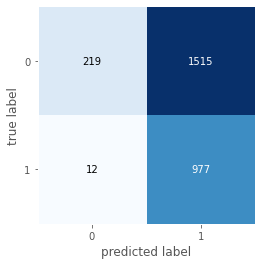

In [532]:
# To plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion2)
plt.show()

In [533]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3455      450
# converted            705       1741  

In [534]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8181388757675957


###### Metrics beyond simply accuracy

In [535]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [536]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7117743254292723


In [537]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8847631241997439


In [538]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11523687580025609


In [539]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7946143313555454


In [540]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8305288461538461


###### We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of

###### We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

## Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [541]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [542]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

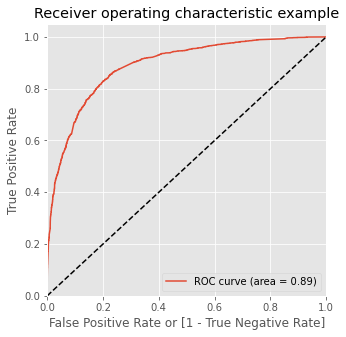

In [543]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

## Finding Optimal Cutoff Point

##### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [544]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192847,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.143494,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.246066,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.879901,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.736362,7987,1,1,1,1,1,1,1,1,1,0,0


In [545]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.602110  0.973017  0.369782
0.2   0.2  0.759408  0.913737  0.662740
0.3   0.3  0.805857  0.850368  0.777977
0.4   0.4  0.814675  0.781276  0.835595
0.5   0.5  0.818139  0.711774  0.884763
0.6   0.6  0.802393  0.606705  0.924968
0.7   0.7  0.787278  0.529845  0.948528
0.8   0.8  0.767123  0.441946  0.970807
0.9   0.9  0.726500  0.309894  0.987452


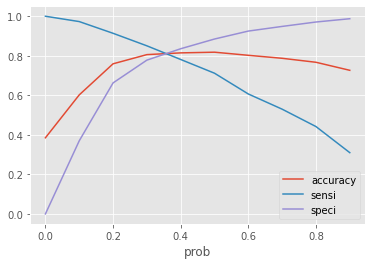

In [546]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [547]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192847,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.143494,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.246066,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.879901,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.736362,7987,1,1,1,1,1,1,1,1,1,0,0,1


### Assigning Lead Score to the Training data

In [548]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.192847,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.143494,1012,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.246066,9226,0,1,1,1,0,0,0,0,0,0,0,0,25
3,1,0.879901,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.736362,7987,1,1,1,1,1,1,1,1,1,0,0,1,74


### Model Evaluation

In [549]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8110533774208786


In [550]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3132,  773],
       [ 427, 2019]], dtype=int64)

In [551]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [552]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8254292722812756


In [553]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8020486555697823


In [554]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19795134443021767


In [555]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7231375358166189


In [556]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8800224782242203


### Precision and Recall

Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [557]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3455,  450],
       [ 705, 1741]], dtype=int64)

In [558]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7946143313555454


In [559]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7117743254292723


Using sklearn utilities for the same

In [560]:
from sklearn.metrics import precision_score, recall_score

In [561]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7946143313555454


In [562]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7117743254292723


#### Precision and recall tradeoff

In [563]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [564]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

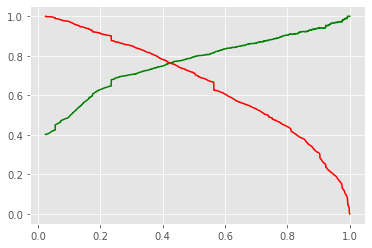

In [565]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###### **The above graph shows the trade-off between the Precision and Recall .

## Making predictions on the test set

#### Scaling the test data

In [566]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [567]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,...,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,1.570000e+02,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1490,0,0,1.513000e+03,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7936,0,0,7.400000e+01,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4216,0,0,2.908851e-17,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3830,0,0,1.640000e+02,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [568]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    1.000000
1490    1.000000
7936    1.000000
4216    0.945083
3830    1.000000
1800    1.000000
6507    1.000000
4821    1.000000
4223    0.969494
4714    0.464518
dtype: float64

In [569]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [570]:
# Let's see the head
y_pred_1.head()

,0
3271,1.000000
1490,1.000000
7936,1.000000
4216,0.945083
3830,1.000000


In [571]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [572]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [573]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [574]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [575]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,1.000000
1,1,1490,1.000000
2,0,7936,1.000000
3,1,4216,0.945083
4,0,3830,1.000000


In [576]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [577]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [578]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,1.000000
1,1490,1,1.000000
2,7936,0,1.000000
3,4216,1,0.945083
4,3830,0,1.000000


In [579]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [580]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,1.000000,1
1,1490,1,1.000000,1
2,7936,0,1.000000,1
3,4216,1,0.945083,1
4,3830,0,1.000000,1


In [581]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.4392214469335292


In [582]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[ 219, 1515],
       [  12,  977]], dtype=int64)

In [583]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [584]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.9878665318503539


In [585]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.12629757785467127


## Assigning Lead Score to the Testing data

In [586]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,1.000000,1,100
1,1490,1,1.000000,1,100
2,7936,0,1.000000,1,100
3,4216,1,0.945083,1,95
4,3830,0,1.000000,1,100


## Observations

#### After running the model on the Test Data , we obtain:

Accuracy : 80.1 %

Accuracy : 80.6 %

Specificity : 79.8 %

### Results :

##### 1) Comparing the values obtained for Train & Test:

#### Train Data:

Accuracy    : 81.1 %

Sensitivity : 82.5 %

Specificity : 80.2 %

#### Test Data:

Accuracy    : 80.1 %

Sensitivity : 80.6 %

Specificity : 79.8 %

##### Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

##### 2) Finding out the leads which should be contacted:

##### The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.¶

In [587]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,1.000000,1,100
1,1490,1,1.000000,1,100
2,7936,0,1.000000,1,100
3,4216,1,0.945083,1,95
4,3830,0,1.000000,1,100
...,...,...,...,...,...
2718,850,0,1.000000,1,100
2719,2879,0,1.000000,1,100
2720,6501,1,1.000000,1,100
2721,7155,0,1.000000,1,100


##### So there are 368 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [588]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([3271, 1490, 7936, ..., 6501, 7155,  376], dtype=int64)

#### 3) Finding out the Important Features from our final model:

In [589]:
res.params.sort_values(ascending=False)

Do Not Call                                             20.546515
Lead Source_Welingak Website                             5.855007
Lead Source_Reference                                    3.295021
What is your current occupation_Working Professional     2.605206
Last Activity_Other_Activity                             2.098283
Last Activity_SMS Sent                                   1.100830
const                                                    1.100730
Total Time Spent on Website                              1.100024
Lead Source_Olark Chat                                   1.070087
Last Activity_Email Opened                               0.665729
Last Activity_Email Link Clicked                         0.446511
Last Activity_Unreachable                                0.323210
Last Notable Activity_Unsubscribed                       0.201656
Specialization_Hospitality Management                   -0.437790
City_Tier II Cities                                     -0.580546
Last Activ

### Recommendations:

The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.

The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.